In [2]:
%pip install matplotlib JSAnimation
# %matplotlib inline

Note: you may need to restart the kernel to use updated packages.


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation
from typing import List

# CartPole 环境准备

CartPole 是一个经典马尔可夫决策过程：下一时刻的状态 $s_{t+1}$ 仅和当前状态 $s_t$ 和动作 $a_t$ 有关。

In [4]:
import gymnasium as gym

env = gym.make('CartPole-v1', render_mode='rgb_array')

In [5]:
print(env.action_space)
print(env.observation_space)

Discrete(2)
Box([-4.8000002e+00 -3.4028235e+38 -4.1887903e-01 -3.4028235e+38], [4.8000002e+00 3.4028235e+38 4.1887903e-01 3.4028235e+38], (4,), float32)


## 简单演示

In [6]:
from JSAnimation.IPython_display import display_animation
from IPython.display import display, HTML

def collect_one_episode() -> List:
    env.reset()
    frames = []

    while True:
        frames.append(env.render())
        action = env.action_space.sample()
        # print(len(env.step(action)))
        state, reward, terminated, truncated, info = env.step(action)
        if terminated:
            break
    
    return frames

def demonstration_gif(frames: List, output_path: str) -> None:
    fig = plt.figure(figsize=(frames[0].shape[1]/72.0, frames[0].shape[0]/72.0), dpi=72)
    patch =plt.imshow(frames[0])
    plt.axis('off')

    def animate(i):
        img = patch.set_data(frames[i])
        return img
    
    anim = animation.FuncAnimation(plt.gcf(), animate, frames=len(frames), interval=50)
    anim.save(output_path)

    return HTML(anim.to_jshtml())

MovieWriter ffmpeg unavailable; using Pillow instead.


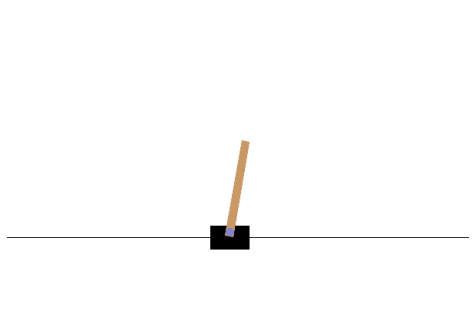

In [7]:
frames = collect_one_episode()
demonstration_gif(frames, '../output/rand_cartpole.gif')

## State Space 离散化

In [8]:
NUM_DIGITIZED = 6

def bins(clip_min, clip_max, num_bins=NUM_DIGITIZED):
    return np.linspace(clip_min, clip_max, num_bins+1)[1: -1]

def digitize_state(observation):
    pos, cart_v, angle, pole_v = observation
    digitized = [
        np.digitize(pos, bins=bins(-2.4, 2.4, NUM_DIGITIZED)),
        np.digitize(cart_v, bins=bins(-3., 3, NUM_DIGITIZED)),
        np.digitize(angle, bins=bins(-0.418, 0.418, NUM_DIGITIZED)),
        np.digitize(pole_v, bins=bins(-2, 2, NUM_DIGITIZED))
    ]
    ind = sum([d * (NUM_DIGITIZED ** i) for i, d in enumerate(digitized)])
    
    return ind

In [24]:
# test digitize

obs = env.reset()
print(obs)
print(digitize_state(obs[0]))

(array([ 0.04272044, -0.01749449, -0.02573096, -0.02805333], dtype=float32), {})
519


# Q-Learning